# **Loading The Dataset**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import cv2
from tqdm import tqdm

In [25]:
#data path
trainpath = 'brain_mri/'

In [60]:
#loading data and resize it and collect it in one folder
new_size=224    
X_train = []
y_train = []
for folder in  os.listdir(trainpath ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in tqdm(files): 
        image_class = {'no': 0, 'yes': 1 }
        orignal_image = cv2.imread(file)
        #image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_train.append(resized_image)
        y_train.append(image_class[folder])
    print('image reading ...finished')
print('--------------------------------------------------')        
#check items in X_test
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 

folder name is :  no
numbers of images in folder are :  84
 start reading images


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 750.00it/s]


image reading ...finished
folder name is :  yes
numbers of images in folder are :  154
 start reading images


100%|███████████████████████████████████████████████████████████████████████████████| 154/154 [00:00<00:00, 493.59it/s]

image reading ...finished
--------------------------------------------------
items in X_train is:        238  items
items in y_train is:        238  items


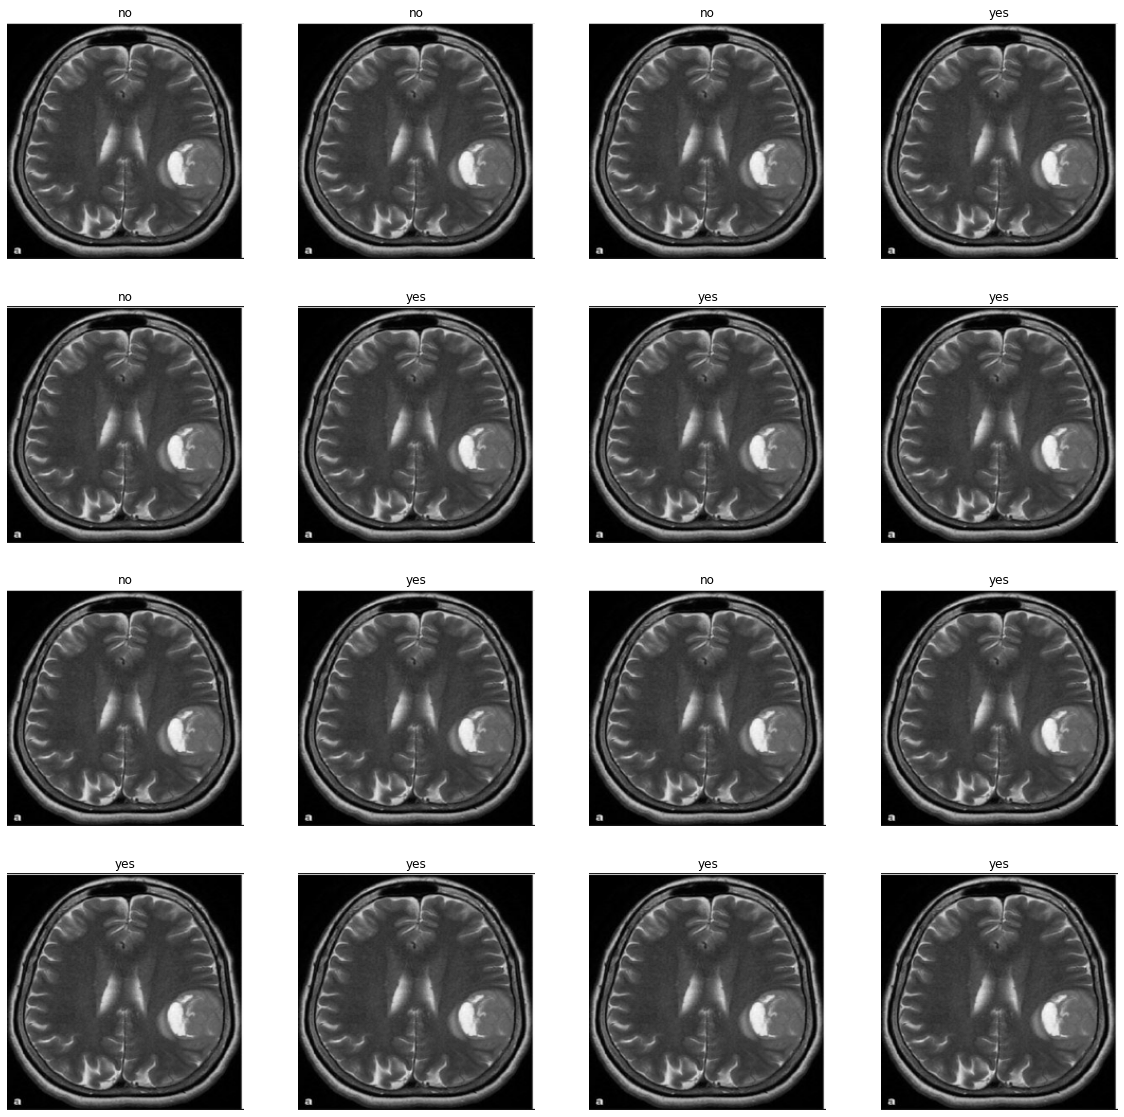

In [61]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train [i],cmap='gray')   
    plt.axis('off')
    classes = {'no': 0, 'yes': 1 }
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))

In [62]:
#converting all TRAIN data to array
X_train = np.array(X_train)
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape  : (238, 224, 224, 1)
y_train shape : (238,)


C:\Users\Nvidia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


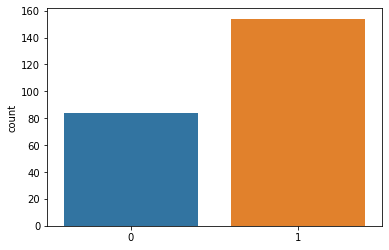

In [63]:
sns.countplot(y_train)
plt.show()

In [64]:
#shuffle data
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=4,stratify=y_train)

In [66]:
#normalizing data
X_train=X_train/255.0
X_test=X_test/255.0

# **Normal CNN**

In [67]:
# Creating the model using the Sequential API
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=64, kernel_size=7, strides=1, 
                padding="same", activation="relu", name="Conv1", input_shape= (224,224,1)))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=5, strides=1, 
                              padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, 
                              padding="same", activation="relu", name="Conv3"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten(name="Flatten1"))
model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))
model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))
model.add(keras.layers.Dense(1, activation="sigmoid", name="Output"))

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 224, 224, 64)      3200      
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 112, 112, 128)     204928    
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 56, 56, 256)       295168    
_________________________________________________________________
Pool3 (MaxPooling2D)         (None, 28, 28, 256)       0         
_________________________________________________________________
Flatten1 (Flatten)           (None, 200704)           

In [68]:
# Plot the model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [69]:
# Compiling the model
model.compile(loss="binary_crossentropy", optimizer= 'adam', metrics=["accuracy"])

# Training the model 
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))
# history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)


Epoch 1/10
14/14 [==============================] - 25s 757ms/step - loss: 0.6741 - accuracy: 0.6355 - val_loss: 0.6535 - val_accuracy: 0.6667
Epoch 2/10
14/14 [==============================] - 5s 330ms/step - loss: 0.6561 - accuracy: 0.6449 - val_loss: 0.6373 - val_accuracy: 0.6667
Epoch 3/10
14/14 [==============================] - 5s 330ms/step - loss: 0.6530 - accuracy: 0.6449 - val_loss: 0.6453 - val_accuracy: 0.6667
Epoch 4/10
14/14 [==============================] - 5s 330ms/step - loss: 0.6552 - accuracy: 0.6449 - val_loss: 0.6369 - val_accuracy: 0.6667
Epoch 5/10
14/14 [==============================] - 5s 330ms/step - loss: 0.6523 - accuracy: 0.6449 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 6/10
14/14 [==============================] - 5s 330ms/step - loss: 0.6569 - accuracy: 0.6449 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 7/10
14/14 [==============================] - 5s 330ms/step - loss: 0.6548 - accuracy: 0.6449 - val_loss: 0.6379 - val_accuracy: 0.6667
Epoch

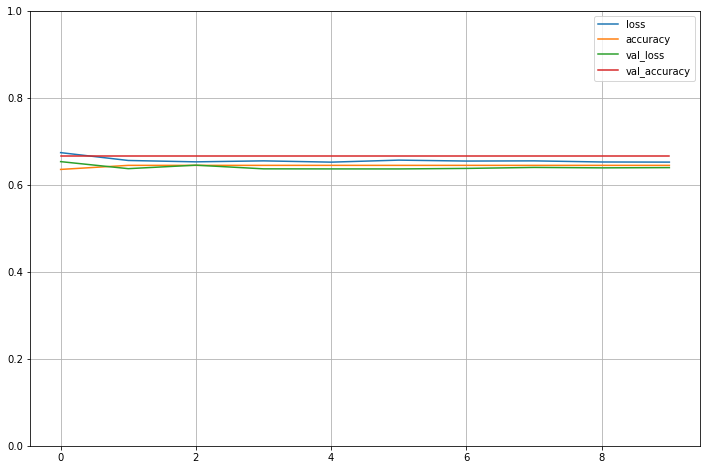

1/1 [==============================] - 4s 4s/step - loss: 0.6397 - accuracy: 0.6667
Loss     :  0.639686644077301
accuracy :  0.6666666865348816


In [70]:
# Plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.67      1.00      0.80        16

    accuracy                           0.67        24
   macro avg       0.33      0.50      0.40        24
weighted avg       0.44      0.67      0.53        24

Confusion matrix : 



C:\Users\Nvidia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nvidia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nvidia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


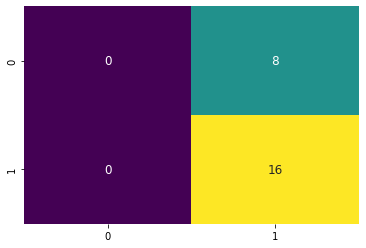

Normalized confusion matrix : 



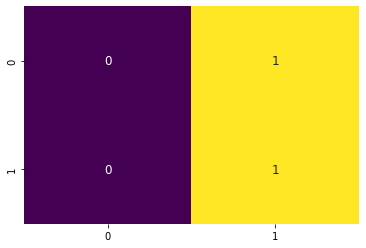

In [71]:
# Confusion Matrix
y_pred = np.round(model.predict(X_test))
#y_pred = (model.predict(X_test) > 0.5).astype("int32").tolist()

class_names = ["0", "1"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
    # Compute confusion matrix
    conf_matx = confusion_matrix(true, preds, normalize = normalize)
    conf_matx = np.round(conf_matx, 2)
    # print(conf_matx)

    # plt.subplots(figsize=(14,8))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
    plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred, "true")



In [ ]:
# Make predictions
# predicted = model.predict(X_new)

# Loading the model:
# model = keras.models.load_model("/content/my_model.h5")

# Save the model
model.save("/content/my_model.h5")


In [ ]:
"""
Image Augmentation
We will use Image Augmentation to train the model on different types 
of combination formed by rotation ,flipping of image so as to increase 
our model accuracy
"""
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center  = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization  = False,  # divide each input by its std
        zca_whitening      = False,# apply ZCA whitening
        rotation_range     = 1,    # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range         = 0.2, # Randomly zoom image 
        width_shift_range  = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip    = True, # randomly flip images
        vertical_flip      = True,  # randomly flip images
        shear_range        = 0.1
)

datagen.fit(X_train)

print("Done ...")


In [72]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    #rescale = 1./255.0,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    rotation_range = 40,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow(X_train,y_train,batch_size=16)

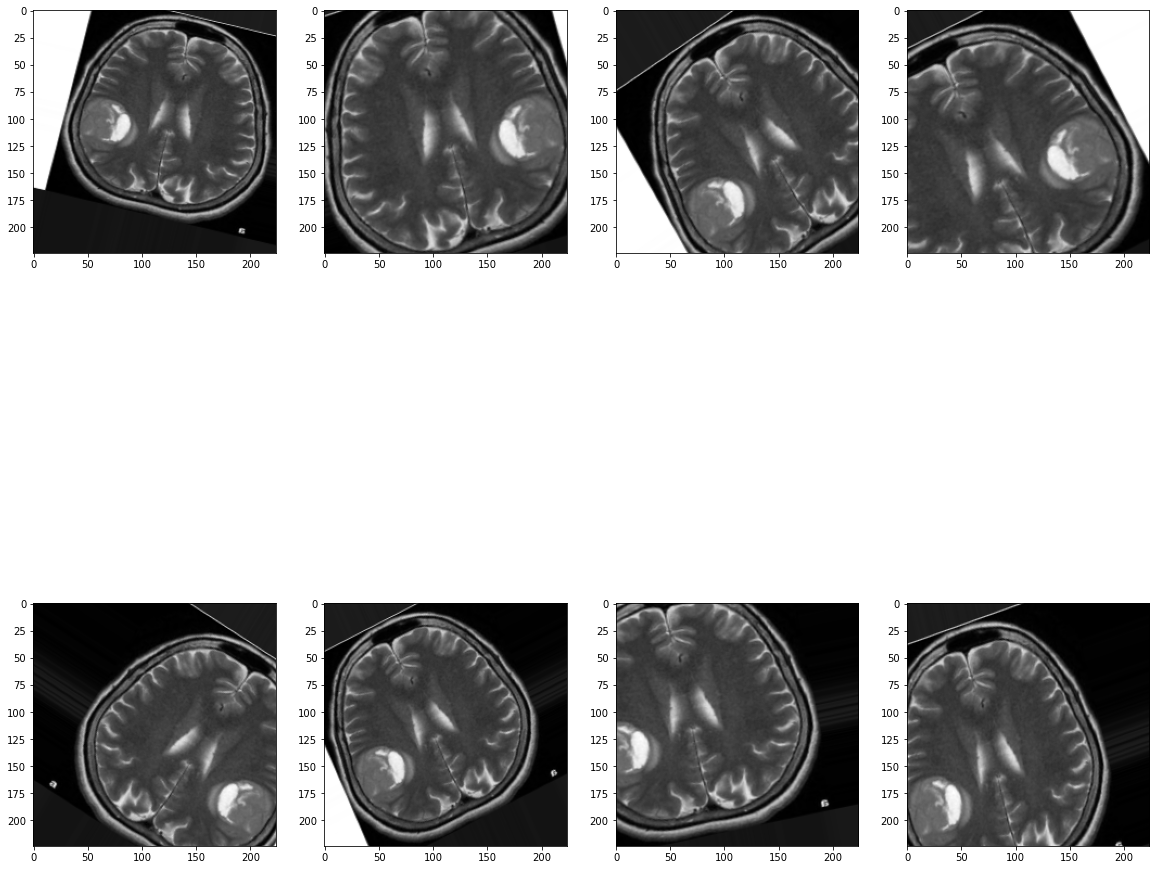

In [84]:
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator :
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i].reshape(X_batch[i].shape[0], X_batch[i].shape[1]),cmap='gray' )
        
    # show the plot
    plt.show()
    break

In [78]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(
    #rescale = 1./255.0
)

test_generator = test_datagen.flow(X_test,y_test,batch_size=8,shuffle=False)

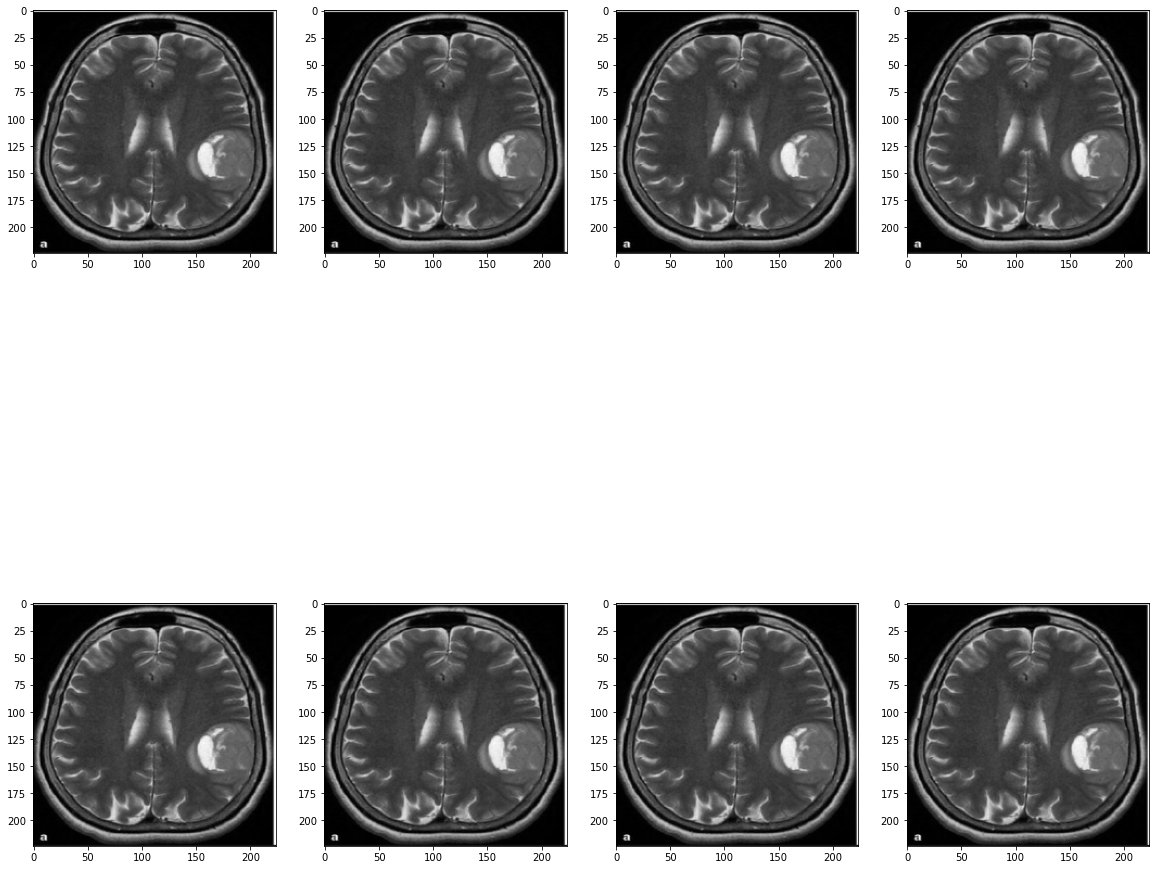

In [82]:
plt.figure(figsize=(10,10))
for X_batch, y_batch in test_generator :
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i].reshape(X_batch[i].shape[0], X_batch[i].shape[1]),cmap='gray' )
        
    # show the plot
    plt.show()
    break

In [ ]:
# Creating the model using the Sequential API
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=64, kernel_size=7, strides=1, 
                padding="same", activation=keras.layers.LeakyReLU(alpha=0.02), name="Conv1", input_shape= (224,224,1)))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=5, strides=1, 
                padding="same", activation=keras.layers.LeakyReLU(alpha=0.02), name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, 
                padding="same", activation=keras.layers.LeakyReLU(alpha=0.02), name="Conv3"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten(name="Flatten1"))
model.add(keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.02), name="Dense1"))
model.add(keras.layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.02), name="Dense2"))
model.add(keras.layers.Dense(1, activation="sigmoid", name="Output"))

# The model’s summary() method displays all the model’s layers
print(model.summary())


In [ ]:
# Plot the model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


In [85]:
# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, clipvalue=1.0)
# optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, clipvalue=1.0)

model.compile(loss="binary_crossentropy", optimizer= optimizer, metrics=["accuracy"])

# Learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.00001, patience=5,
                                      monitor="val_accuracy", min_lr=0.0000001)

# Interrupts training when it measures no progress on the validation set
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, monitor = "val_loss",
                                                  restore_best_weights=True)

# Class weight
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                 classes = np.unique(y_train),
                                                 y = y_train)
class_weights = dict(enumerate(class_weights))

# Training the model
history = model.fit(train_generator,
                    steps_per_epoch = len(train_generator) ,
                    epochs          = 10,
                    class_weight    = class_weights,  
                    validation_data = test_generator,  
                    callbacks = [lr_scheduler, early_stopping_cb])


Epoch 1/10
14/14 [==============================] - 6s 362ms/step - loss: 0.7141 - accuracy: 0.4953 - val_loss: 0.6849 - val_accuracy: 0.6667
Epoch 2/10
14/14 [==============================] - 5s 353ms/step - loss: 0.6938 - accuracy: 0.6449 - val_loss: 0.6871 - val_accuracy: 0.6667
Epoch 3/10
14/14 [==============================] - 5s 352ms/step - loss: 0.6935 - accuracy: 0.6449 - val_loss: 0.6874 - val_accuracy: 0.6667
Epoch 4/10
14/14 [==============================] - 5s 352ms/step - loss: 0.6934 - accuracy: 0.6449 - val_loss: 0.6882 - val_accuracy: 0.6667
Epoch 5/10
14/14 [==============================] - 5s 352ms/step - loss: 0.6933 - accuracy: 0.6449 - val_loss: 0.6886 - val_accuracy: 0.6667
Epoch 6/10
14/14 [==============================] - 5s 352ms/step - loss: 0.6933 - accuracy: 0.6449 - val_loss: 0.6887 - val_accuracy: 0.6667
Epoch 7/10
14/14 [==============================] - 5s 352ms/step - loss: 0.6932 - accuracy: 0.6449 - val_loss: 0.6887 - val_accuracy: 0.6667
Epoch 

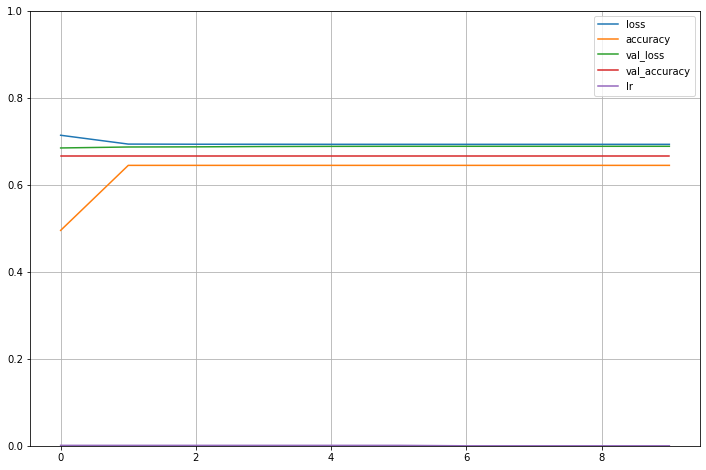

1/1 [==============================] - 0s 364ms/step - loss: 0.6887 - accuracy: 0.6667
Loss            :  0.6887230277061462
accuracy        :  0.6666666865348816


In [86]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss            : ",model_evaluate[0])
print("accuracy        : ",model_evaluate[1])


Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.67      1.00      0.80        16

    accuracy                           0.67        24
   macro avg       0.33      0.50      0.40        24
weighted avg       0.44      0.67      0.53        24

Confusion matrix : 



C:\Users\Nvidia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nvidia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nvidia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


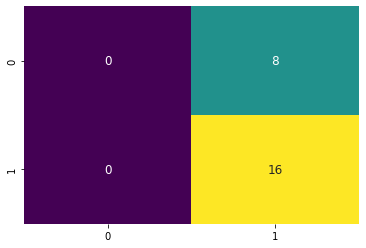

Normalized confusion matrix : 



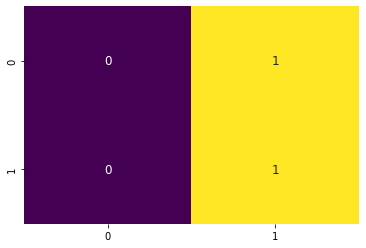

In [87]:
# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32").tolist()

class_names = ["0", "1"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
    # Compute confusion matrix
    conf_matx = confusion_matrix(true, preds, normalize = normalize)
    conf_matx = np.round(conf_matx, 2)
    # print(conf_matx)

    # plt.subplots(figsize=(14,8))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
    plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")


# Make predictions
# predicted = model.predict(X_new)

# Save the model
# model.save("/content/my_model.h5")


# **Inference**

In [ ]:
!pip install gradio

In [90]:
img = cv2.imread("Y2.jpg")
H,W,C = 224,224,1
img = cv2.resize(img, (H, W)) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
img = np.array(img)
img = img.astype("float32")  
img = img / 255.0

img = img.reshape(1,H,W,C)
print(img.shape)

prediction = np.round(model.predict(img).flatten())
# prediction = (model.predict(img) > 0.5).astype("int32").flatten()
print(prediction)


(1, 224, 224, 1)
[1.]


In [89]:
# https://gradio.app/docs/

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests
import cv2

def inference(img):
    labels =["Normal","Tumor"]
    H,W,C = 224,224,1
    img = cv2.resize(img, (H, W)) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.array(img)
    img = img.astype("float32")/255.0
    img = img.reshape(1,H,W,C)
    pred = model.predict(img).flatten()
    prediction = [pred[0], 1-pred[0]]
    dictionary = dict(zip(labels, map(float, prediction)))
    return dictionary

nbr_top_classes = 2
gr.Interface(fn=inference, 
             inputs=gr.inputs.Image(), 
             outputs=gr.outputs.Label(num_top_classes=nbr_top_classes),
             theme="dark"
             ).launch(share=True) #, debug=True Use in Colab


Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://33669.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x1a352dec9a0>,
 'http://127.0.0.1:7860/',
 'https://33669.gradio.app')